In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

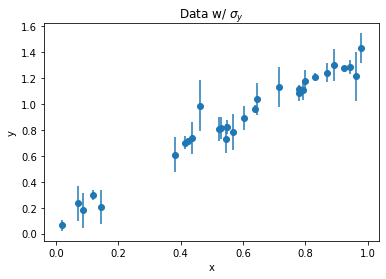

In [2]:
data = np.loadtxt('data.txt',skiprows=1)
x = data[:,0]
y = data[:,1]
e = data[:,2]

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'Data w/ $\sigma_y$')
ax.errorbar(x,y,e,linestyle='none')
fig.show()

In [3]:
X = np.vander(x,N=3,increasing=True)
C = np.diag(e**2)
Ci = np.linalg.inv(C)

In [4]:
pars = np.linalg.inv(X.T @ Ci @ X) @ (X.T @ Ci @ y)
print('a =', pars[2])
print('b =', pars[1])
print('c =', pars[0])

def quad(cba, x):
    c,b,a = cba
    y = a*x**2 + b*x + c
    return y

x_ = np.linspace(0,1)
y_ = quad(pars,x_)

a = -0.42081551288021046
b = 1.6930694290842325
c = 0.06881083737266636


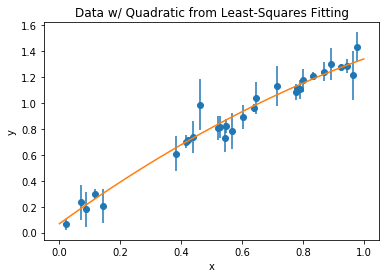

In [5]:
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.errorbar(x,y,e,linestyle='none')
ax.plot(x_,y_)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'Data w/ Quadratic from Least-Squares Fitting')
fig.show()